In [ ]:
# mount Google Drive, captura da fonte de dados
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# importar fonte de dados
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/D01-OBITOS-COVID19-MINAS-GERAIS.csv', sep=';')

In [5]:
# Analisando formato do DataFrame
print("DataFrame: ",df.shape)
df.head(6)

DataFrame:  (2894, 6)


,PACIENTE,SEXO,IDADE,MUNICIPIO_RESIDENCIA,DATA_OBITO,COMORBIDADE
0,1,M,79,Patos de Minas,28/03/2020,SIM
1,2,F,82,Belo Horizonte,29/03/2020,SIM
2,3,M,66,Belo Horizonte,30/03/2020,SIM
3,4,M,44,Mariana,30/03/2020,NÃO
4,5,M,80,Uberlândia,30/03/2020,SIM
5,6,M,72,Ouro Fino,31/03/2020,NÃO


In [8]:
# Tratando a coluna 'sexo':
df.SEXO.replace(['M'],'Masculino', inplace=True)
df.SEXO.replace(['F'],'Feminino', inplace=True)

In [13]:
# Visualização do tratamento da coluna 'sexo'
print("DataFrame: ",df.shape)
df.head(4)

DataFrame:  (2894, 6)


,PACIENTE,SEXO,IDADE,MUNICIPIO_RESIDENCIA,DATA_OBITO,COMORBIDADE
0,1,Masculino,79,Patos de Minas,28/03/2020,SIM
1,2,Feminino,82,Belo Horizonte,29/03/2020,SIM
2,3,Masculino,66,Belo Horizonte,30/03/2020,SIM
3,4,Masculino,44,Mariana,30/03/2020,NÃO


In [14]:
# Verificando se existem valores duplicados.
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2889    False
2890    False
2891    False
2892    False
2893    False
Length: 2894, dtype: bool

In [15]:
# Analisando os tipos das colunas.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2894 entries, 0 to 2893
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PACIENTE              2894 non-null   int64 
 1   SEXO                  2894 non-null   object
 2   IDADE                 2894 non-null   int64 
 3   MUNICIPIO_RESIDENCIA  2894 non-null   object
 4   DATA_OBITO            2823 non-null   object
 5   COMORBIDADE           2894 non-null   object
dtypes: int64(2), object(4)
memory usage: 135.8+ KB


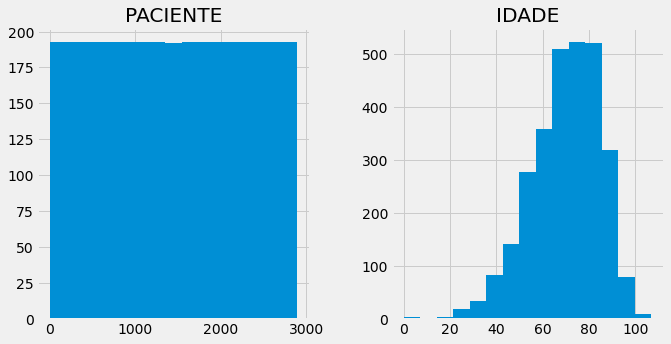

In [44]:
# plotar o histograma das variaveis
df.hist(bins=15, figsize=(10,5));

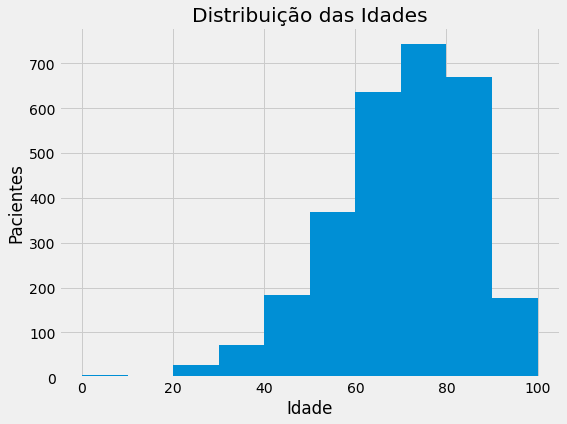

In [47]:
# Vamos visualizar entre quais faixas de idade à uma maior concentração de valores.
# Distribuição da coluna 'idade':
plt.figure(figsize=(8, 6))
plt.hist(df.IDADE, bins=range(0, 110,10))
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Pacientes');

In [56]:
df.groupby('SEXO')['IDADE'].value_counts()

SEXO       IDADE
Feminino   74       46
           83       40
           72       37
           78       37
           80       37
                    ..
Masculino  30        1
           31        1
           102       1
           104       1
           107       1
Name: IDADE, Length: 171, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


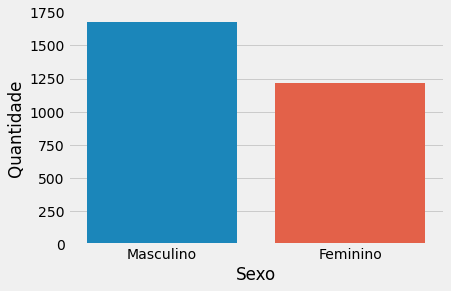

In [70]:
# Distribuição por Sexo
sns.countplot(df.SEXO)
plt.xlabel('Sexo')
plt.ylabel('Quantidade');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


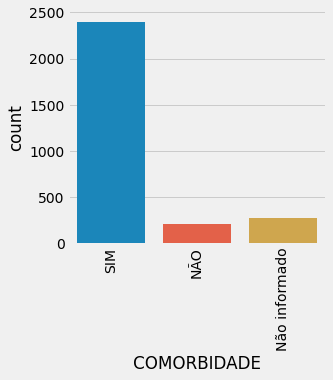

In [62]:
# Distribuição dos valores por comorbidade.
plt.figure(figsize=(14,4))
plt.subplot(131)
sns.countplot(df.COMORBIDADE)
plt.xticks(rotation=90)

plt.show()